In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import copy
import sys
import random

In [2]:
import os
sys.path.append(f'{os.getcwd()}/RL_Environment')

In [3]:
from rl_nlp_world import *

pygame 2.1.0 (SDL 2.0.16, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


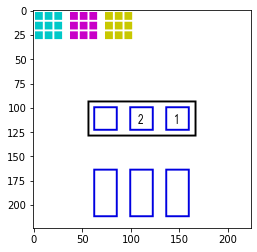

This is twenty one. There are 0 blocks in hundred's place, 0 blocks in ten's place and 0 blocks in unit's place.
ACTION 1


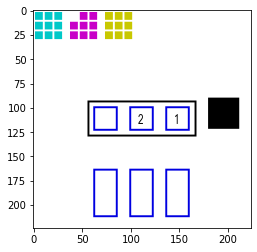

This is twenty one. There are 0 blocks in hundred's place, 0 blocks in ten's place and 0 blocks in unit's place. You are holding a ten block.
ACTION 3
Cumulative Reward ~ -0.9; TimeTaken ~ 2


In [4]:
# random policy
def policy(observation):
    global action_indx
    # PICK_BIG=0
    # PICK_MED=1
    # PICK_SMALL=2
    # PUT_BIG=3
    # PUT_MED=4
    # PUT_SMALL=5
    return random.randint(0, 5)

def displayState(observation):
    mirror_image = np.flip(observation['visual'], axis=0)
    rotated_image = np.rot90(mirror_image, k=-1)
    plt.imshow(rotated_image)
    plt.show()
    print(observation['text'])
    sys.stdout.flush()

env = RlNlpWorld(render_mode="rgb_array", instr_type = "state")
episodes = 1
for _ in range(episodes):
    cumulative_reward,steps=0,0
    observation = env.reset(set_no = 21)
    while True:
        displayState(observation)
        action = policy(copy.deepcopy(observation))  # User-defined policy function
        print(f'ACTION {action}')
        observation, reward, terminated, info = env.step(action)
        cumulative_reward+=reward
        steps+=1
        if terminated:
            break
    print(f'Cumulative Reward ~ {cumulative_reward}; TimeTaken ~ {steps}')
env.close()